In [36]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


data_dir = r"C:\Users\Jens\Documents\Code\BactUnet\_results\mcherry_compare"

def read_mcherry_data(path):
    out = pd.DataFrame()
    #out_count = pd.DataFrame()
    with os.scandir(path) as it:
        for entry in it:
            if entry.name.endswith('TPs.csv'):
                name = entry.name.split("_")
                fname = name[0]+"_"+name[1]
                network = name[2]
                tp_df = pd.read_csv(entry.path)
                gt_df = pd.read_csv(path+"\\"+fname+"_"+network+"_counts.csv")
                count_df = pd.read_csv(path+"\\"+fname+"_"+network+"_auto.csv")
                dic_df = pd.read_csv(path+"\\"+fname+"_DIC_count.csv")
                frames = np.array(count_df.index) + int(name[1])
                count_df['frame'] =  frames
                count_df['file'] = fname
                count_df['network'] = network
                count_df["TP"] = tp_df["Count"]
                count_df["manual_mcherry"] = gt_df["Count"]
                count_df["auto_mcherry"] = count_df["Count"]
                count_df["manual_DIC"] = dic_df["Count"]
                count_df["ratio_man_DIC"] = count_df["manual_mcherry"]/count_df["manual_DIC"]
                count_df["ratio_auto_man"] = count_df["auto_mcherry"]/count_df["manual_mcherry"]
                count_df["ratio_auto_DIC"] = count_df["auto_mcherry"]/count_df["manual_DIC"]
                
                out = pd.concat([out, count_df], ignore_index=True)
        return out 
mcherry_data = read_mcherry_data(data_dir)

mcherry_data = mcherry_data.filter(items=['Average Size','frame','file', 'TP', 'manual_mcherry', 
                                          'auto_mcherry','manual_DIC', 'ratio_man_DIC', 'ratio_auto_man', 'ratio_auto_DIC'])

print(mcherry_data.head(), mcherry_data.shape)



   Average Size  frame        file   TP  manual_mcherry  auto_mcherry  \
0         6.624    210  BT0398_210  117             155           121   
1         6.896    211  BT0398_210  119             155           122   
2         6.460    212  BT0398_210  108             152           112   
3         6.924    213  BT0398_210  112             156           114   
4         6.655    214  BT0398_210  114             157           117   

   manual_DIC  ratio_man_DIC  ratio_auto_man  ratio_auto_DIC  
0         162       0.956790        0.780645        0.746914  
1         166       0.933735        0.787097        0.734940  
2         162       0.938272        0.736842        0.691358  
3         167       0.934132        0.730769        0.682635  
4         165       0.951515        0.745223        0.709091   (54, 10)


<AxesSubplot:xlabel='file', ylabel='ratio_man_DIC'>

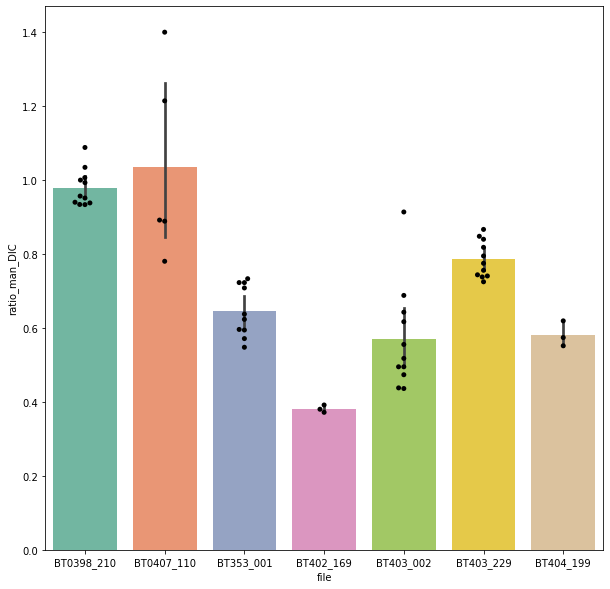

In [47]:
f, ax = plt.subplots(figsize=(10, 10))

# Draw a violinplot with a narrower bandwidth than the default
sns.barplot(data=mcherry_data, y='ratio_man_DIC', x='file', palette="Set2")
sns.swarmplot(data=mcherry_data, y='ratio_man_DIC', x='file', color='black')
# Finalize the figure
#ax.set(ylim=(-.7, 1.05))
#sns.despine(left=True, bottom=True)


<AxesSubplot:xlabel='file', ylabel='ratio_auto_man'>

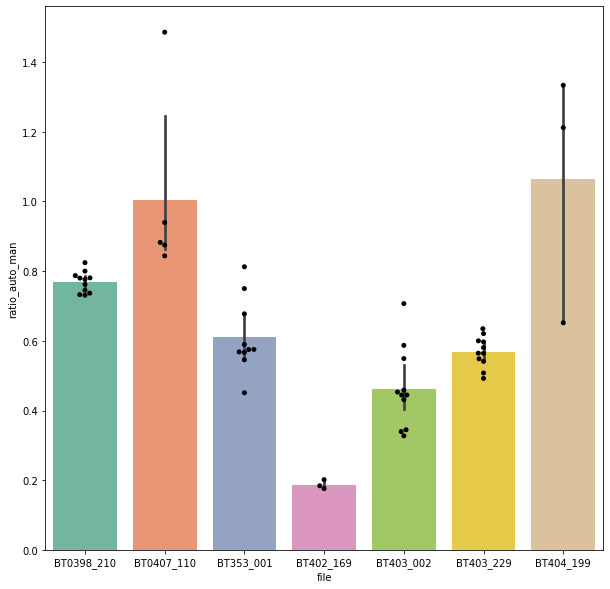

In [48]:
f, ax = plt.subplots(figsize=(10
                              , 10))
sns.barplot(data=mcherry_data, y='ratio_auto_man', x='file',palette="Set2")
sns.swarmplot(data=mcherry_data, y='ratio_auto_man', x='file', color='black')
#ax.set(ylim=(0, 10))

<AxesSubplot:xlabel='file', ylabel='ratio_auto_DIC'>

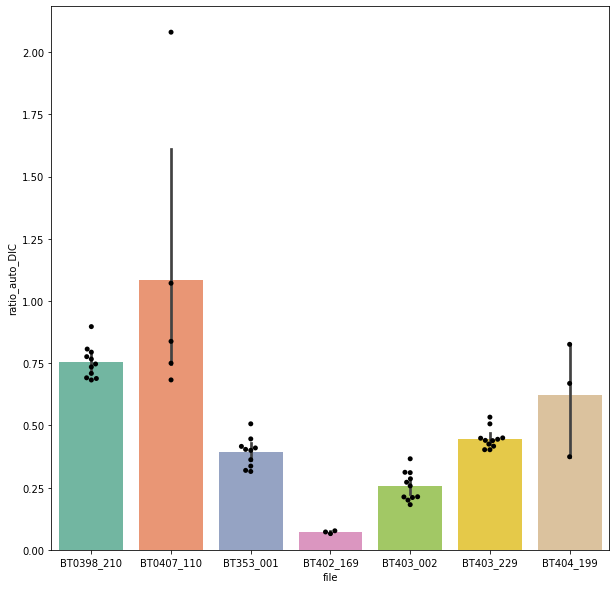

In [49]:
f, ax = plt.subplots(figsize=(10
                              , 10))
sns.barplot(data=mcherry_data, y='ratio_auto_DIC', x='file', palette="Set2")
sns.swarmplot(data=mcherry_data, y='ratio_auto_DIC', x='file', color='black')
#ax.set(ylim=(0, 10))

In [57]:
#df = mcherry_data.filter(items=['file', 'ratio_man_DIC', 'ratio_auto_man', 'ratio_auto_DIC'])
df1 = mcherry_data.filter(items=['file', 'ratio_man_DIC'])
df1 = df1.rename(columns={'ratio_man_DIC':'ratio'})
df1['comparrison'] = 'Manual mcherry vs manual DIC'
df2 = mcherry_data.filter(items=['file', 'ratio_auto_man']).rename(columns={'ratio_auto_man':'ratio'})
df2['comparrison'] = 'Automatic vs manual mCherry'
df3 = mcherry_data.filter(items=['file', 'ratio_auto_DIC']).rename(columns={'ratio_auto_DIC':'ratio'})
df3['comparrison'] = 'Automatic mcherry vs manual DIC'


df = pd.concat([df1, df2, df3])
df

,file,ratio,comparrison
0,BT0398_210,0.956790,Manual mcherry vs manual DIC
1,BT0398_210,0.933735,Manual mcherry vs manual DIC
2,BT0398_210,0.938272,Manual mcherry vs manual DIC
3,BT0398_210,0.934132,Manual mcherry vs manual DIC
4,BT0398_210,0.951515,Manual mcherry vs manual DIC
...,...,...,...
49,BT403_229,0.506329,Automatic mcherry vs manual DIC
50,BT403_229,0.533333,Automatic mcherry vs manual DIC
51,BT404_199,0.825806,Automatic mcherry vs manual DIC
52,BT404_199,0.374194,Automatic mcherry vs manual DIC


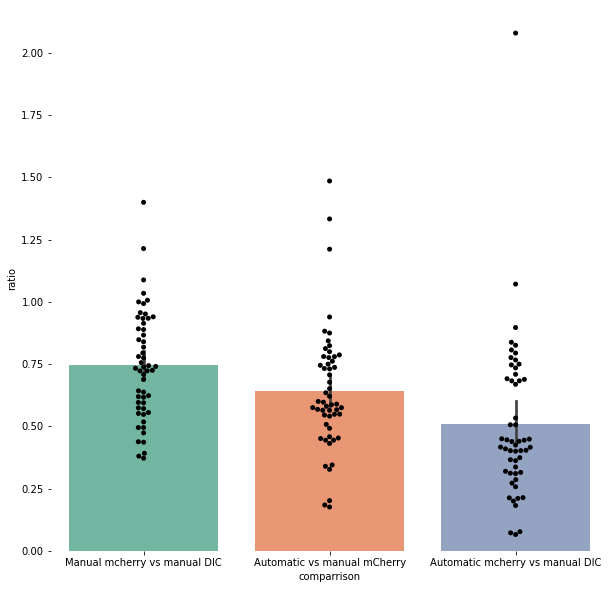

In [76]:
f, ax = plt.subplots(figsize=(10, 10))

# Draw a violinplot with a narrower bandwidth than the default
sns.barplot(data=df, palette="Set2", linewidth=1, x='comparrison', y='ratio')
sns.swarmplot(data=df, x='comparrison', y='ratio', color='black', marker='o')
# Finalize the figure
#ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)
#plt.xticks(rotation=45)